### Welcome to the Southern Water Corp Python Case Study!

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

**Matplotlib** - This is Python's basic plotting library.
We'll use the pyplot and dates function collections from matplotlib throughout this case study. Also, we include the line **'%matplotlib inline'** so that our graphs are easily included in our notebook. We will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable us to create aesthetically pleasing plots.

**Pandas** - This library will enable us to view and manipulate our data in a tabular format.

**statsmodel.api** - This library will enable us to create statistical models. We will need this library when perfroming regession analysis in Part 2 of this case study.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
from datetime import datetime
import numpy as np


---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
Unfortunately, the data received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. 

In [2]:
dataframe_1 = pd.read_csv('Desalination_Unit_File_001.csv', header=1)
dataframe_1['TIMEFRAME'] = pd.to_datetime(dataframe_1['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')

dataframe_2 = pd.read_excel('Desalination_Unit_File_002.xlsx', header=1)
dataframe_2['TIMEFRAME'] = pd.to_datetime(dataframe_2['TIMEFRAME']).apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S')if not pd.isnull(x) else '')

dataframe_3 = pd.read_excel('Desalination_Unit_File_003.xlsx', header=1)
dataframe_3['TIMEFRAME'] = pd.to_datetime(dataframe_3['TIMEFRAME']).apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S')if not pd.isnull(x) else '')

dataframe = pd.concat([dataframe_1 ,dataframe_2, dataframe_3])
dataframe['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True)
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True)

dataframe.head()
#dataframe.describe()

,index,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0),TIMEFRAME
0,0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,12/09/2014 00:00:00
1,1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,12/09/2014 00:01:00
2,2,0.0,-7.447938,0.0,0.0,0.0,0.0,378.112800,0.0,0.0,12/09/2014 00:01:00
3,3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.028300,0.0,0.0,12/09/2014 00:01:00
4,4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,0.0,12/09/2014 00:02:00


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 11 columns):
index                          6998 non-null int64
SURJEK_FLOW_METER_1            6998 non-null float64
SURJEK_FLOW_METER_2            6998 non-null float64
ROTATIONAL_PUMP_RPM            6998 non-null float64
SURJEK_PUMP_TORQUE             6998 non-null float64
MAXIMUM_DAILY_PUMP_TORQUE      6998 non-null float64
SURJEK_AMMONIA_FLOW_RATE       6998 non-null float64
SURJEK_TUBE_PRESSURE           6998 non-null float64
SURJEK_ESTIMATED_EFFICIENCY    6998 non-null float64
PUMP FAILURE (1 or 0)          6998 non-null float64
TIMEFRAME                      6998 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 601.5+ KB


In [4]:
dataframe.head()

,index,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0),TIMEFRAME
0,0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,12/09/2014 00:00:00
1,1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,12/09/2014 00:01:00
2,2,0.0,-7.447938,0.0,0.0,0.0,0.0,378.112800,0.0,0.0,12/09/2014 00:01:00
3,3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.028300,0.0,0.0,12/09/2014 00:01:00
4,4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,0.0,12/09/2014 00:02:00


# Profiling

In [5]:
#import pandas_profiling
#profile = dataframe.profile_report()
#profile

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data. You should now also have a rough sense of the number of entires in each dataset. 

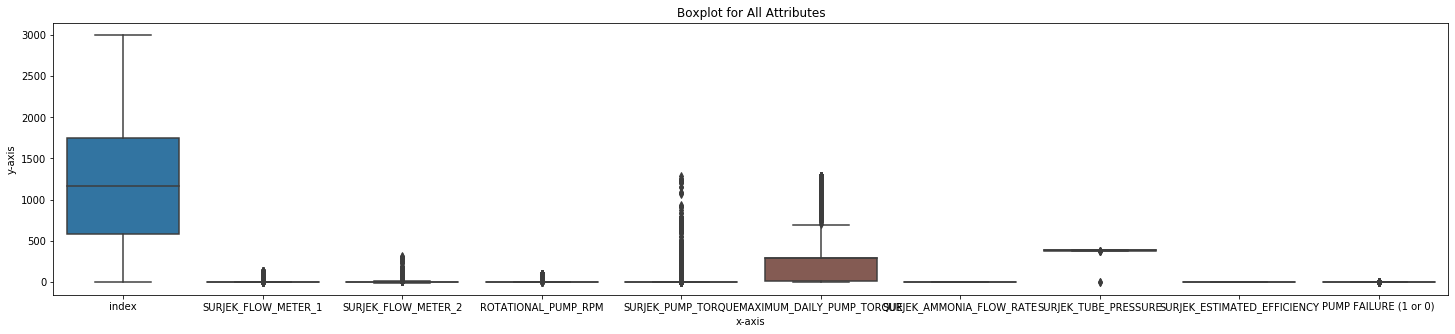

In [6]:
plt.figure(figsize=(25,5))
_ = sns.boxplot(data=dataframe)

#sns.boxplot(x='SURJEK_FLOW_METER_1', y='index', data=dataframe)

_ = plt.xlabel('x-axis')
_ = plt.ylabel('y-axis')
plt.title('Boxplot for All Attributes')
plt.show()

#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

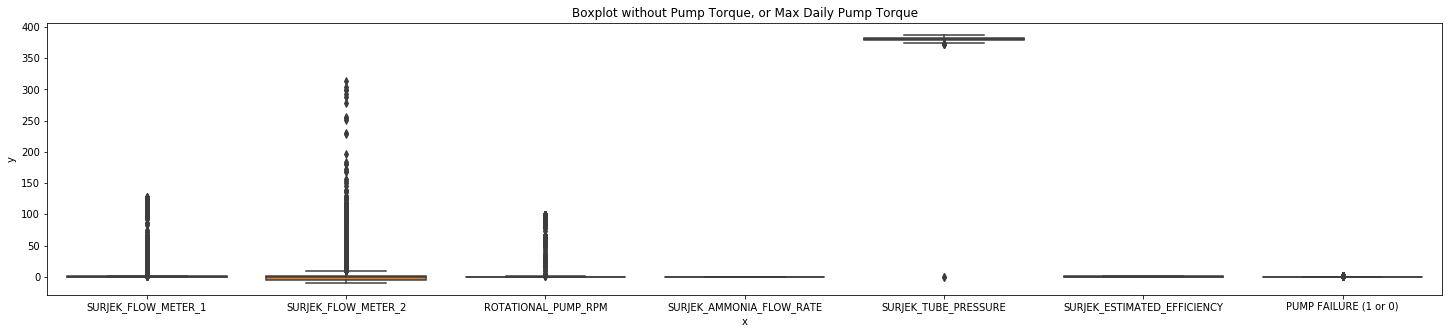

In [7]:
#Below is the first part of the code
filt = dataframe[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']] 
mpl.rcParams['figure.figsize'] = (25,5)
#--write your code below------
boxplotfilt = sns.boxplot(data=filt)
plt.title('Boxplot without Pump Torque, or Max Daily Pump Torque')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

**Open-ended Question:**

What variables seem to have the largest variation when the Pump has failed?


## Please put your code here

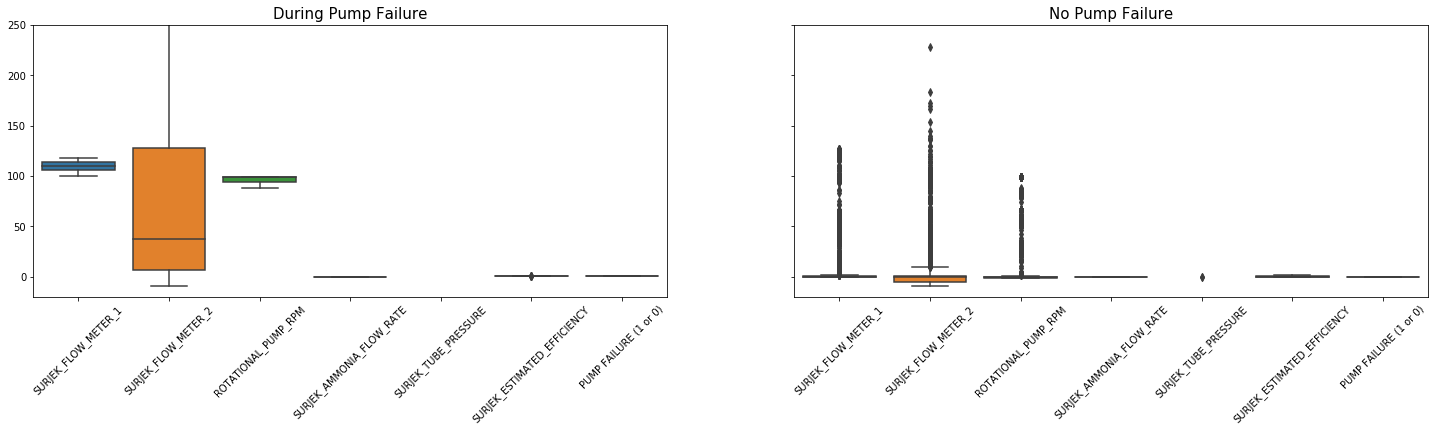

In [8]:
f, axes = plt.subplots(1, 2, sharey=True)
import matplotlib as mpl

pumpfail = dataframe[dataframe['PUMP FAILURE (1 or 0)'] == 1]

pumpnotfail = dataframe[dataframe['PUMP FAILURE (1 or 0)'] == 0]

pumpfailed = pumpfail[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']]

pumpnotfailed = pumpnotfail[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']] 
mpl.rcParams['figure.figsize'] = (25,5)


sns.boxplot(data=pumpfailed, orient='v', ax = axes[0] ).set_title("During Pump Failure", fontsize=15)
sns.boxplot(data=pumpnotfailed, orient='v', ax = axes[1]).set_title("No Pump Failure", fontsize=15)

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=45, size=10)

plt.show()


### From analysing the boxplots, you'll notice that there seem to be a number of outliers.
The interquartile ranges used to remove the outliers from each column. Happily, Python allows us to do this process more quickly and efficiently and Excel, as you'll see in <span style="color:green">Step 6</span>.

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

Next, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [9]:
#quantiles = dataframe.quantile([0.25, 0.75])
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
#quantiles=pd.DataFrame({'Q1':Q1, 'Q3':Q3, 'IQR':IQR })
#quantiles

index                          583.000000
SURJEK_FLOW_METER_1              0.000000
SURJEK_FLOW_METER_2             -4.766639
ROTATIONAL_PUMP_RPM             -0.687240
SURJEK_PUMP_TORQUE              -2.030993
MAXIMUM_DAILY_PUMP_TORQUE        9.177878
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           379.028300
SURJEK_ESTIMATED_EFFICIENCY      0.000000
PUMP FAILURE (1 or 0)            0.000000
Name: 0.25, dtype: float64
index                          1749.000000
SURJEK_FLOW_METER_1               0.704162
SURJEK_FLOW_METER_2               0.981540
ROTATIONAL_PUMP_RPM               0.000000
SURJEK_PUMP_TORQUE               -1.680961
MAXIMUM_DAILY_PUMP_TORQUE       285.493400
SURJEK_AMMONIA_FLOW_RATE          0.000000
SURJEK_TUBE_PRESSURE            382.690400
SURJEK_ESTIMATED_EFFICIENCY       1.240724
PUMP FAILURE (1 or 0)             0.000000
Name: 0.75, dtype: float64
index                          1166.000000
SURJEK_FLOW_METER_1               0.704162
SURJEK_FLO

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do we have? What will happen to our dataset if we remove them all?

i) Calculate how many entries we currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries we'd have if we were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure our dataframe doesn't include the attribute TIMEFRAME.


In [10]:
df = dataframe.drop('TIMEFRAME', axis=1) # drops timeframe column
df = dataframe.drop('index', axis=1) # drops index column

df_outliersremoved = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(len(df)) + " entries") 


#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we removed outliers from the dataset, we have " + str(len(df_outliersremoved)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(df_outliersremoved)/len(df)) )

When we have not removed any outliers from the dataset, we have 6998 entries
When we removed outliers from the dataset, we have 3855 entries
The proportion of outliers which exist when compared to the dataframe are: 0.5508716776221778


---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, we create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if we are doing a failure analysis, it is likely those outliers actually contain valuable insights we will want to keep as they represent a deviation from the norm that we'll need to understand. 


#### Note 2: Display the two boxplots side-by-side. We can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


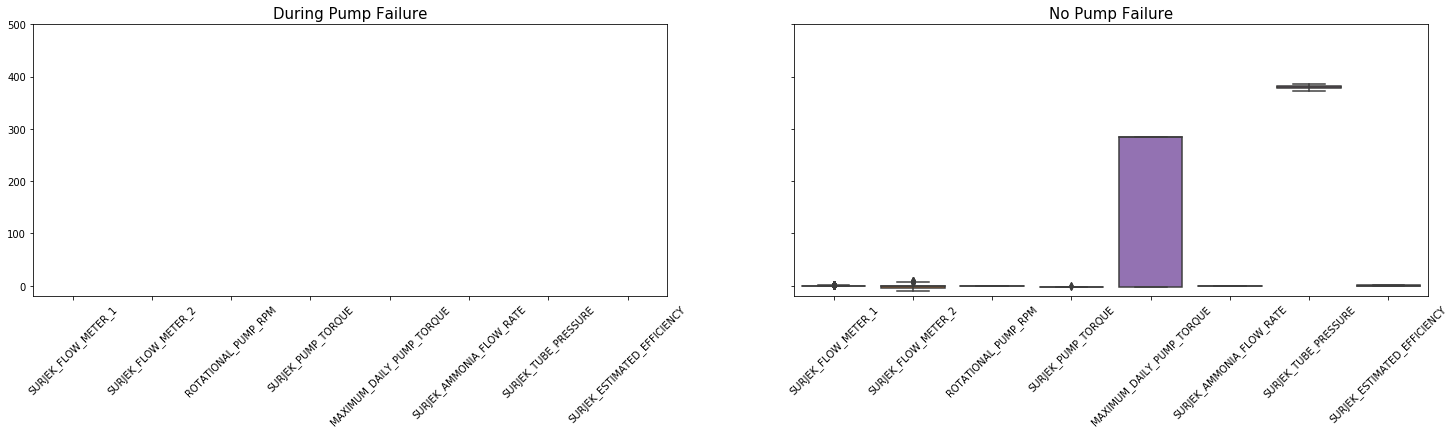

In [11]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']

f, axes = plt.subplots(1, 2, sharey=True)
import matplotlib as mpl

pumpfail = df_outliersremoved[df_outliersremoved['PUMP FAILURE (1 or 0)'] == 1]
pumpnotfail = df_outliersremoved[df_outliersremoved['PUMP FAILURE (1 or 0)'] == 0]
pumpFailFilt = pumpfail[filt]
pumpNotFailFilt = pumpnotfail[filt]

mpl.rcParams['figure.figsize'] = (25,5)

sns.boxplot(data=pumpFailFilt, orient='v', ax = axes[0] ).set_title("During Pump Failure", fontsize=15)
sns.boxplot(data=pumpNotFailFilt, orient='v', ax = axes[1]).set_title("No Pump Failure", fontsize=15)

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,500)
    plt.xticks(rotation=45, size=10)

plt.show()


### Based on the boxplots we've created, we've likely come to the conclusion that, for this case study, we actually _shouldn't_ remove the outliers, as we are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 

Using a loop, we iterate through each of the Column Names and plot the data. 

Find the minimum (min) and maximum (max) time in the dataframe. Include a title with min and max time. 

**Note:** For each plot, ensure that we have a dual axis set up so we can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

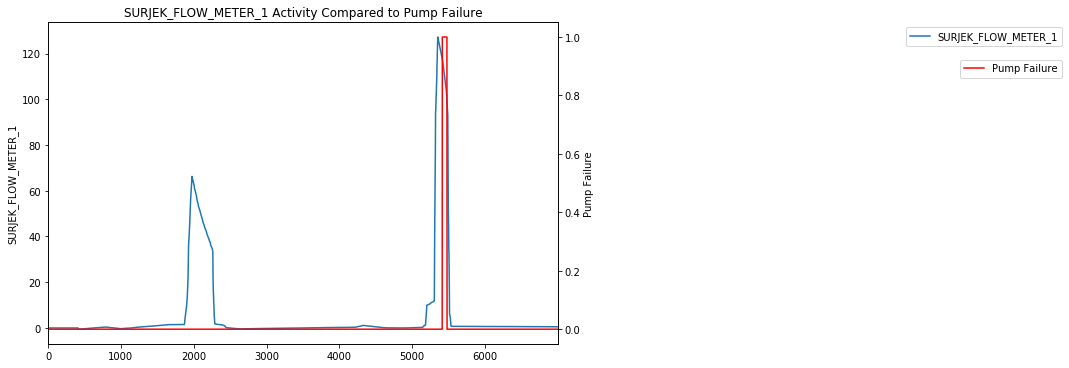

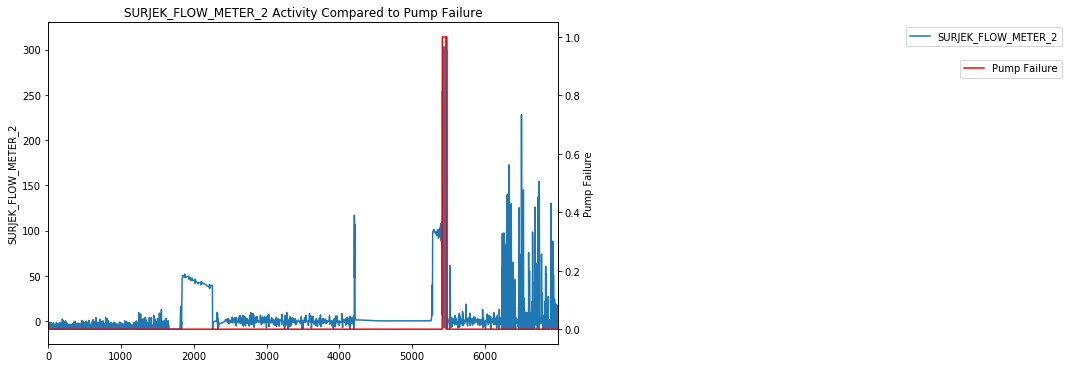

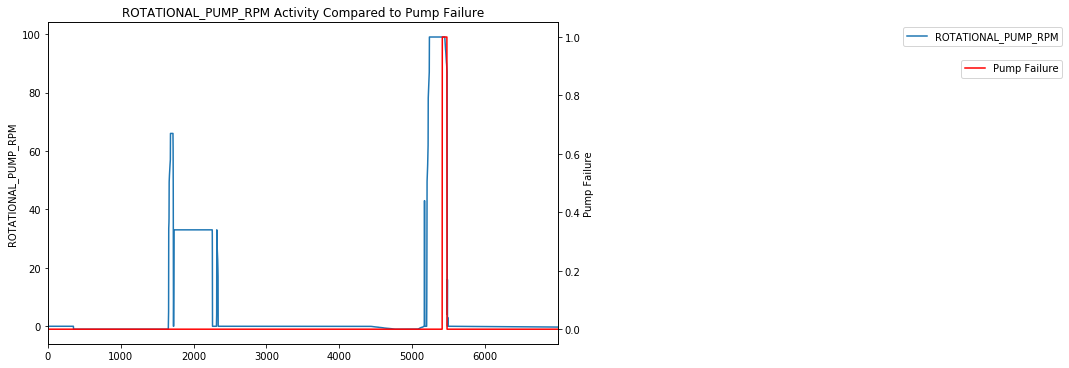

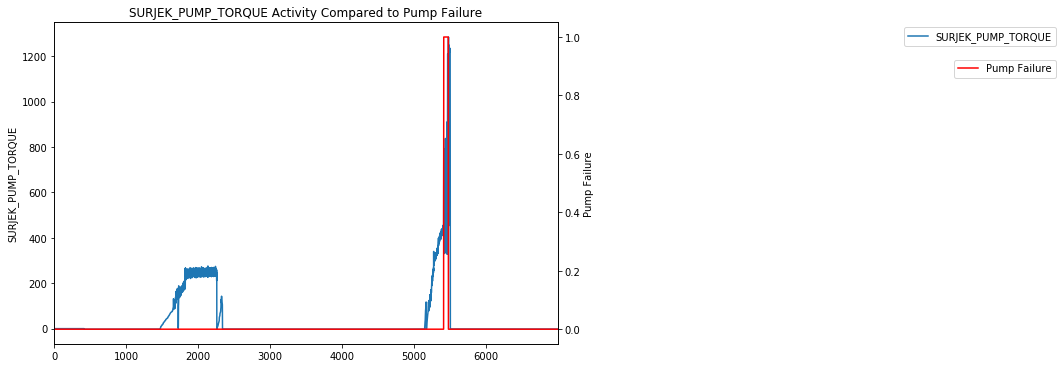

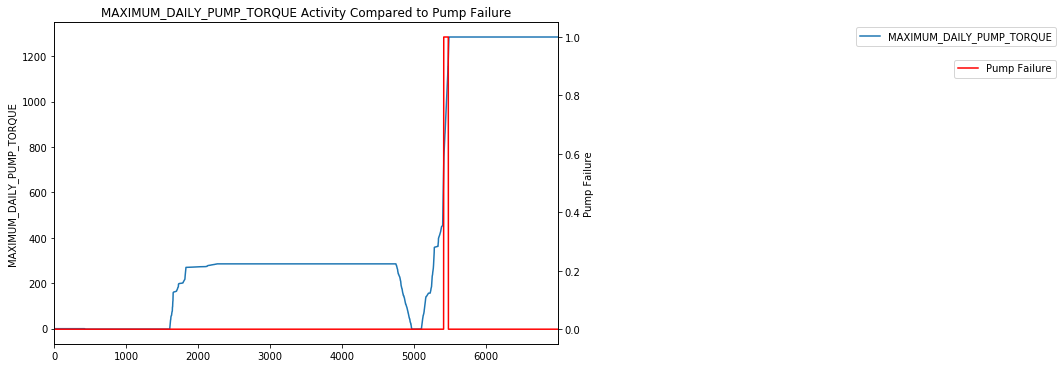

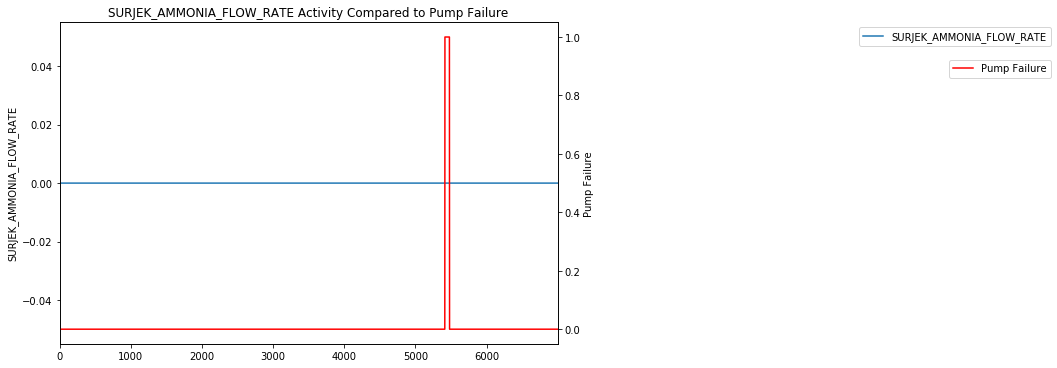

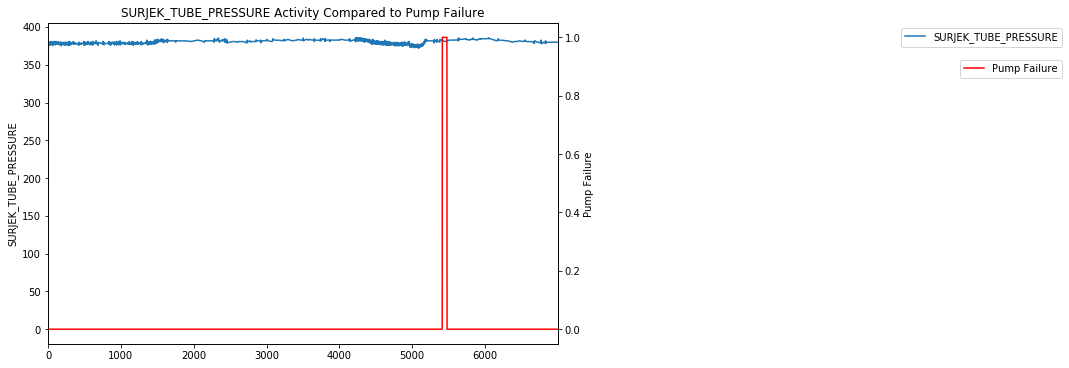

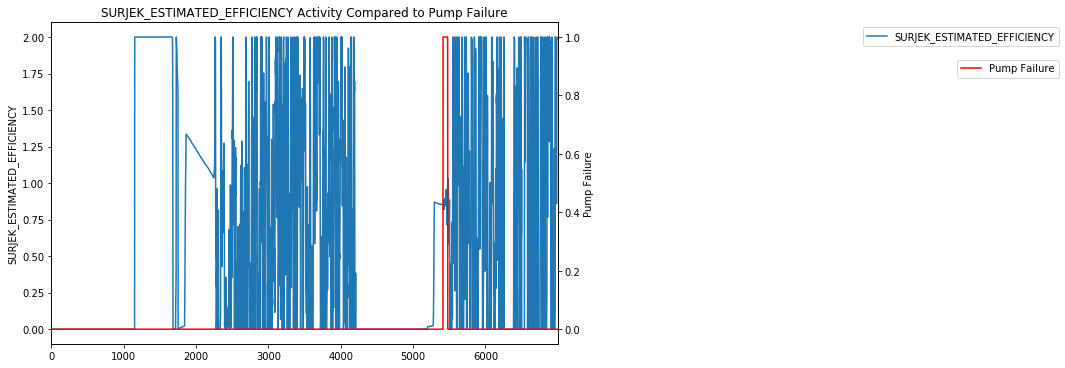

In [12]:
filt2 = ['PUMP FAILURE (1 or 0)']

colList = dataframe[filt].columns
mpl.rcParams['figure.figsize'] = (35,5)


for i in colList:
    failurestate = dataframe[filt2]
    ax = dataframe[i].plot()
    ax.set_ylabel(i)
    ax2 = ax.twinx()
    ax2.plot(failurestate, 'red', label='Pump Failure')
    ax2.set_ylabel("Pump Failure")
    
    ax.legend(bbox_to_anchor=(2, 1))
    ax2.legend(bbox_to_anchor=(2, 0.9))
    
    minTime =  dataframe.index.min()
    maxTime = dataframe.index.max()
    plt.tight_layout()
    plt.title(i + " Activity Compared to Pump Failure")

    plt.show()



Of course, given that all the attributes have varying units, we might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that we include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

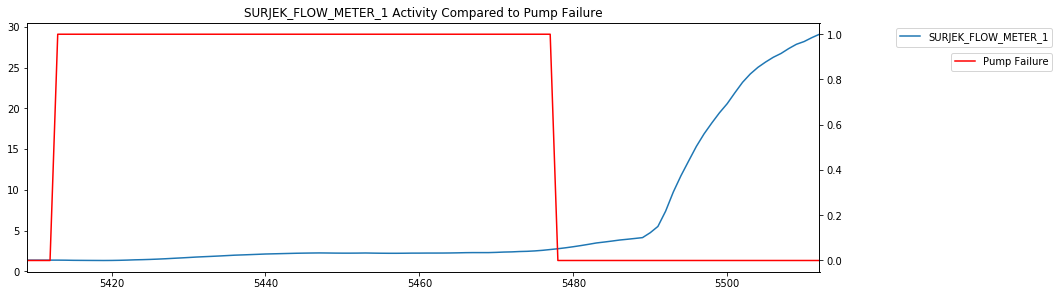

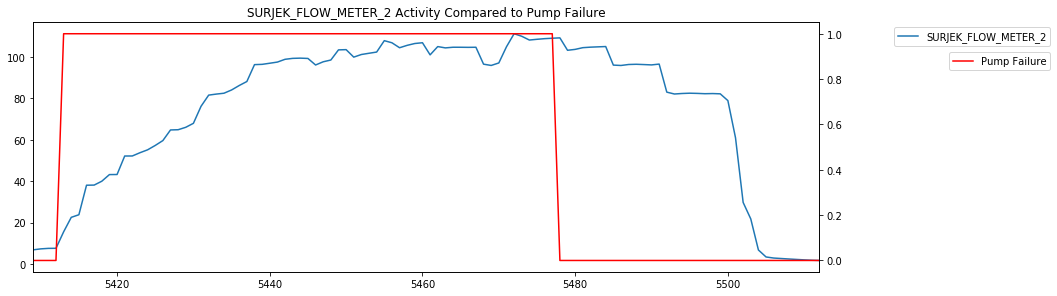

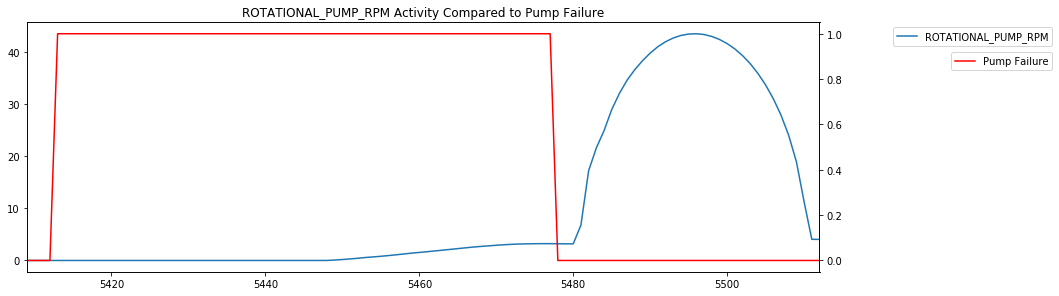

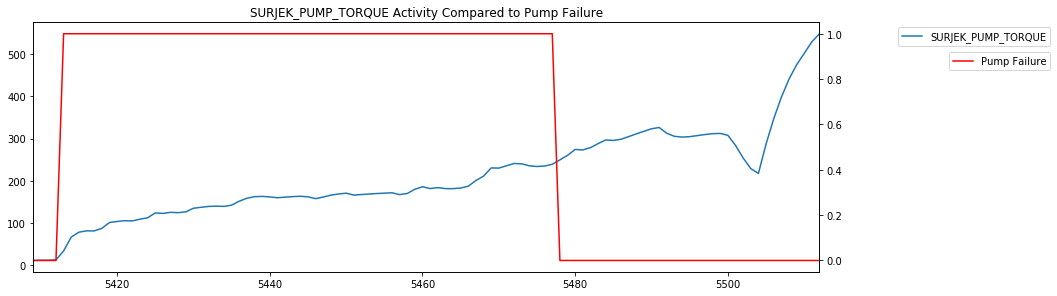

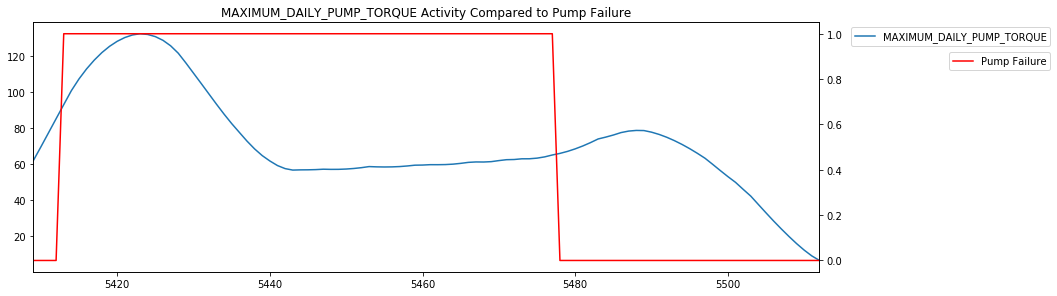

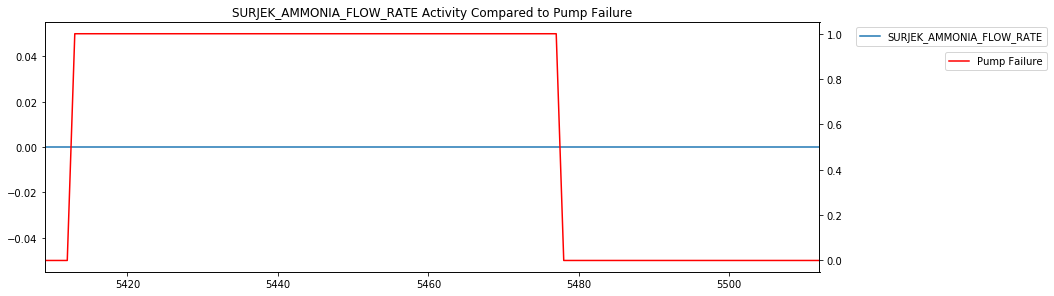

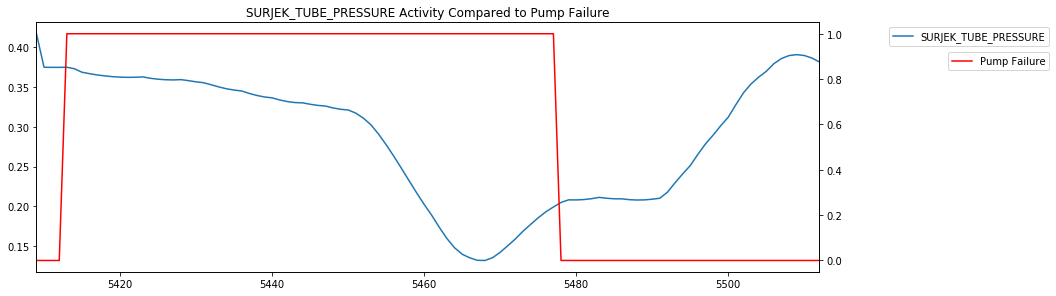

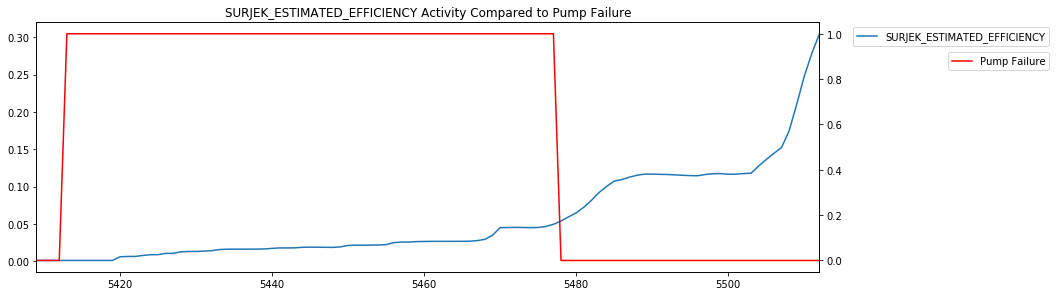

In [13]:
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']

colList = dataframe[filt3].columns
mpl.rcParams['figure.figsize'] = (15,4)

rollingdf = dataframe[filt3].rolling(30).std()
rollingdf.dropna(inplace=True)
rollingdf = rollingdf.join(dataframe[['PUMP FAILURE (1 or 0)', 'TIMEFRAME']], how='inner')


#----write your code below-------
rollingdf_filtered = rollingdf[(rollingdf['TIMEFRAME'] >= "12/10/2014 14:40:00")&\
                               (rollingdf['TIMEFRAME'] <= "12/10/2014 14:45:00")]
failurestate = rollingdf_filtered[filt2]


#Loop through the Plot
for i in colList:
    ax = rollingdf_filtered[i].plot()
    ax2 = ax.twinx()
    ax2.plot(failurestate, 'red', label = 'Pump Failure')
    
    #### how to combine legend
    
    ax.legend(bbox_to_anchor=(1.30, 1))
    ax2.legend(bbox_to_anchor=(1.30, 0.9))
    
    minTime = rollingdf_filtered.index.min()
    maxTime = rollingdf_filtered.index.max()
    plt.tight_layout()
    plt.title(i + " Activity Compared to Pump Failure")
    plt.show()





## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When we performed inferential statistics for Southern Water Corp using Excel, we made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, we'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in our toolbox will allow us to quickly create beautiful graphics that provide key insights. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, we create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

(8.0, 0.0)

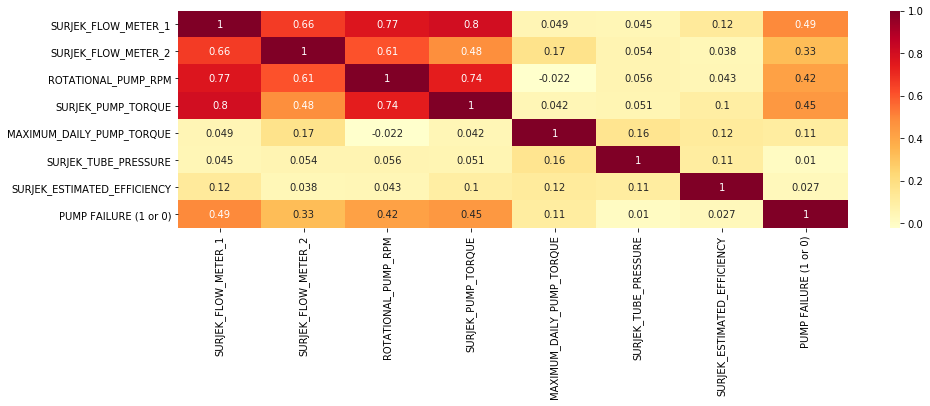

In [14]:
filt4 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']

dfcorr = dataframe[filt4].corr()

dfheatmap = sns.heatmap(dfcorr, cmap='YlOrRd', annot=True)
bottom, top = dfheatmap.get_ylim()
dfheatmap.set_ylim(bottom + 0.5, top - 0.5)



**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

### Please put your code here

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

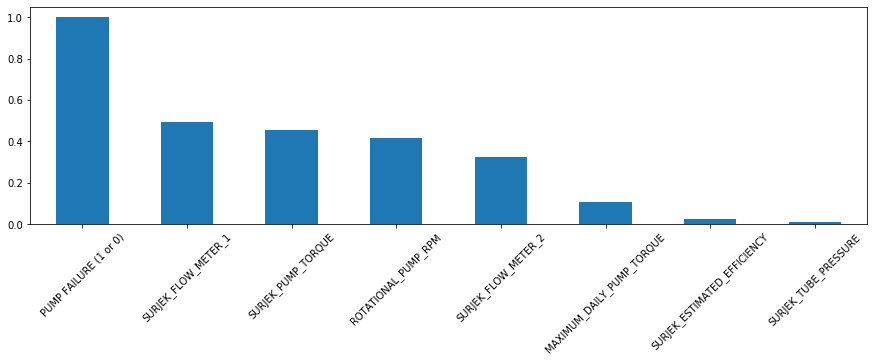

In [15]:
colList_corr = dfcorr.columns

dfcorr=dfcorr.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
dfcorr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.xticks(rotation=45)

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, we created a correlation matrix using 'raw' variables. This time, we'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out?

(8.0, 0.0)

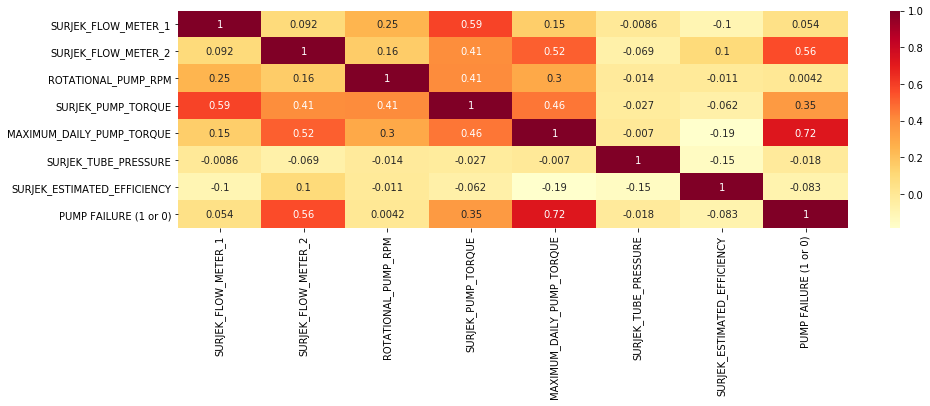

In [16]:
dfcorr_rolling = rollingdf[filt4].corr()

dfcorr_rolling_heatmap = sns.heatmap(dfcorr_rolling, cmap='YlOrRd', annot=True)
bottom, top = dfcorr_rolling_heatmap.get_ylim()
dfcorr_rolling_heatmap.set_ylim(bottom + 0.5, top - 0.5)


### Creating a Multivariate Regression Model


Using the statsmodel.api library we imported earlier, we call the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all our independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time we use the rolling standard deviation variables we created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

In [17]:
dependentVar = dataframe['PUMP FAILURE (1 or 0)']
# X is a matrix 
X = dataframe[filt3]
X = sm.add_constant(X)
y = dataframe[filt2]

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.264
Model:                               OLS   Adj. R-squared:                  0.264
Method:                    Least Squares   F-statistic:                     358.8
Date:                   Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                           10:42:46   Log-Likelihood:                 7548.9
No. Observations:                   6998   AIC:                        -1.508e+04
Df Residuals:                       6990   BIC:                        -1.503e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1293      0.056      2.318      0.020       0.020       0.239
SURJEK_FLOW_METER_1             0.0017   9.98e-05     16.797      0.000       0.001       0.002
SURJEK_FLOW_METER_2            -0.0001   5.77e-05     -2.085      0.037      -0.000   -7.17e-06
ROTATIONAL_PUMP_RPM             0.0003   8.17e-05      4.110      0.000       0.000       0.000
SURJEK_PUMP_TORQUE              0.0001   1.43e-05      7.011      0.000    7.23e-05       0.000
MAXIMUM_DAILY_PUMP_TORQUE    2.036e-05   2.18e-06      9.321      0.000    1.61e-05    2.46e-05
SURJEK_AMMONIA_FLOW_RATE     2.142e-19   1.51e-19      1.415      0.157   -8.26e-20    5.11e-19
SURJEK_TUBE_PRESSURE           -0.0004      0.000     -2.516      0.012      -0.001   -8.17e-05
SURJEK_ESTIMATED_EFFICIENCY    -0.0052      0.001     -3.866      0.000      -0.008      -0.003
==============================================================================
Omnibus:                     7983.490   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           972591.134
Skew:                           5.871   Prob(JB):                         0.00
Kurtosis:                      59.548   Cond. No.                     6.43e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

---------------------------------------------------------------------------

In [18]:
X = rollingdf[filt3]
X = sm.add_constant(X)
y = rollingdf[filt2]
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.626
Model:                               OLS   Adj. R-squared:                  0.625
Method:                    Least Squares   F-statistic:                     1662.
Date:                   Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                           10:42:46   Log-Likelihood:                 9857.5
No. Observations:                   6969   AIC:                        -1.970e+04
Df Residuals:                       6961   BIC:                        -1.964e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0123      0.001    -11.184      0.000      -0.014      -0.010
SURJEK_FLOW_METER_1            -0.0024      0.000     -7.291      0.000      -0.003      -0.002
SURJEK_FLOW_METER_2             0.0016   6.42e-05     25.601      0.000       0.002       0.002
ROTATIONAL_PUMP_RPM            -0.0065      0.000    -30.669      0.000      -0.007      -0.006
SURJEK_PUMP_TORQUE              0.0003   2.55e-05     10.093      0.000       0.000       0.000
MAXIMUM_DAILY_PUMP_TORQUE       0.0059   8.82e-05     66.887      0.000       0.006       0.006
SURJEK_AMMONIA_FLOW_RATE     8.313e-19   5.97e-20     13.935      0.000    7.14e-19    9.48e-19
SURJEK_TUBE_PRESSURE            0.0002      0.000      0.403      0.687      -0.001       0.001
SURJEK_ESTIMATED_EFFICIENCY     0.0026      0.002      1.122      0.262      -0.002       0.007
==============================================================================
Omnibus:                     2611.798   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405452.729
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      40.341   Cond. No.                     6.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

---------------------------------------------------------------------------

### Step 15: <span style="color:purple">Make a Prediction</span> 

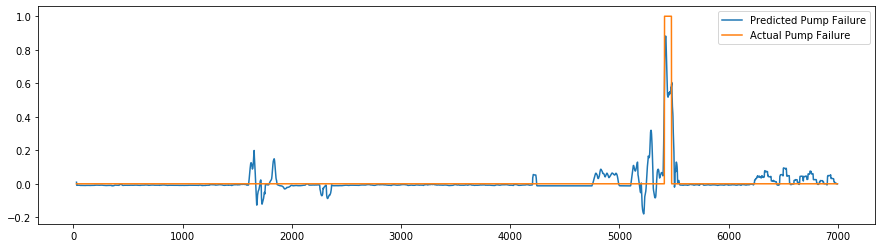

In [19]:
mpl.rcParams['figure.figsize'] = (15,4)

yPrediction = OLSmodelResult.predict(X)
plt.plot(yPrediction, label='Predicted Pump Failure')
plt.plot(y, label='Actual Pump Failure')
#legend, title, axis titles
plt.legend()
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")


We see that the highest point in our prediction lead actually had a pump failure. One thing to note is that around 2000 in the graph above, there is some activity that is related to potential pump failure. This is because attributes in the analysis above also shows increased activity that is related to pump failure. It is possible that there is another external attribute(s) that influence pump failure. It may we worth looking into.